In [225]:
#import os.path
import numpy as np
import pandas as pd
import cPickle as pickle
from image_processing import get_domi_color_new_image
from scipy.spatial.distance import cosine, euclidean

In [245]:
from sklearn.cluster import KMeans
import skimage
from pyimage.pipeline import ImagePipeline
from collections import Counter
import time
%matplotlib inline

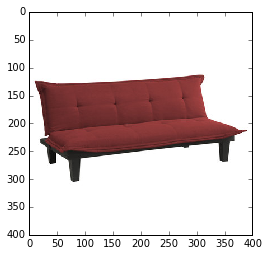

In [7]:
image = skimage.io.imread('wayfair/images/sofa_all/futon_DRL1299_12.jpg')
skimage.io.imshow(image)

In [44]:
domi_color = get_domi_color_new_image(image)
domi_color

array([ 0.44787078,  0.19762043,  0.19725439])

In [21]:
def show_domi_color(image, n_clusters=2):
    image = skimage.transform.resize(image, (300,300,3))
    nrow, ncol, depth = image.shape 
    lst_of_pixels = [image[irow][icol] for irow in range(nrow) for icol in range(ncol)]
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit_transform(lst_of_pixels)
    domi_colors = kmean.cluster_centers_ 
    domi_colors = domi_colors.reshape((1,n_clusters,3))
    skimage.io.imshow(domi_colors)
    return domi_colors

array([[[ 0.99857286,  0.99824809,  0.99818238],
        [ 0.4478624 ,  0.19760153,  0.19723607]]])

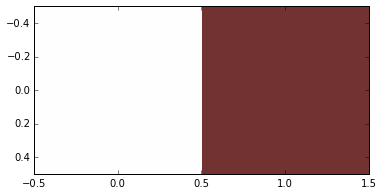

In [22]:
show_domi_color(image)

In [27]:
product_id = 'DRL1299'
sofa_all_df = pd.read_json('wayfair/sofa_all.json')
text = sofa_all_df[sofa_all_df['product_id']==product_id].description_all.values[0]

In [28]:
text

u'Style meets functionality in the DHP Lodge Futon Frame and Mattress. This modular futon and mattress can be converted from a sofa to a bed in less than a minute, thanks to the incorporated Click-Clack sofa technology. Featuring a wooden frame, this futon is strong and sturdy. The mattress section is upholstered in microfiber that makes the futon comfortable for sitting or sleeping for long hours. As this futon and mattress is available in black color, it mingles well with almost all color schemes. This Lodge Futon Frame and Mattress by DHP requires assembly upon arrival. It has a maximum weight carrying capacity of 600 lbs. \n\nFeatures\n\nIdeal for sitting, lounging and sleeping\nAdvanced click-clack mechanism\nMicrofiber upholstery for easy clean\nWeight limit: 600 lbs\nMattress is attached to the frame\nRecommended for spot cleaning only\nCompatible with Twin size sheets\n\n\n\nProduct Details\n\nStyle:  Contemporary\n\n\nFrame Material:  Wood\n\n\nToss Pillows Included:  No\n\nUp

# Now for the new image: I've got the image & text

## load models & stuff
    # domi_color_dict
    # km_color_domi
    # cluster_label_dict_domi
    
    # feature_dict_pca
    # pca_scaler
    # pca_model
    # km_feature_pca
    # cluster_label_dict_pca
    
    # tfidf
    # tfidf_matrix

In [92]:
with open('wayfair/pickle/sofa_domi_color_dict.pkl') as f:
    domi_color_dict = pickle.load(f)
with open('wayfair/pickle/sofa_km_color_domi.pkl') as f:
    km_color_domi = pickle.load(f)

with open('wayfair/pickle/sofa_feature_dict_pca.pkl') as f:
    feature_dict_pca = pickle.load(f)
with open('wayfair/pickle/sofa_pca_scaler.pkl') as f:
    pca_scaler = pickle.load(f)
with open('wayfair/pickle/sofa_pca_model.pkl') as f:
    pca_model = pickle.load(f)
with open('wayfair/pickle/sofa_km_feature_pca.pkl') as f:
    km_feature_pca = pickle.load(f)

In [34]:
with open('wayfair/pickle/sofa_cluster_label_dict_domi.pkl') as f:
    cluster_label_dict_domi = pickle.load(f)
with open('wayfair/pickle/sofa_cluster_label_dict_pca.pkl') as f:
    cluster_label_dict_pca = pickle.load(f)

In [113]:
with open('wayfair/pickle/sofa_tfidf.pkl') as f:
    tfidf = pickle.load(f)
with open('wayfair/pickle/sofa_tfidf_matrix.pkl') as f:
    tfidf_matrix = pickle.load(f)

## domi color:

In [37]:
domi_label = km_color_domi.predict(domi_color)[0]
domi_label

6

In [42]:
domi_same_label = []
for i in cluster_label_dict_domi:
    if cluster_label_dict_domi[i] == domi_label:
        domi_same_label.append(i)

In [192]:
domi_same_label[0].split('.')[0].split('_')[-2]

'MCRR1607'

In [193]:
similar_item_domi = []
for i in domi_same_label:
    similar_item_domi.append(i.split('.')[0].split('_')[-2])
similar_item_domi

['MCRR1607',
 'DRL1299',
 'KMDS1431',
 'EL2638',
 'FZU1801',
 'NEI1108',
 'XHX2148',
 'MCRR1869',
 'EL2641',
 'DQPG1046',
 'GQ3384',
 'DQH1414',
 'LAZA1090',
 'DQPG1040',
 'DQPG1036',
 'GNT5298',
 'OTL1508',
 'MCRR1869',
 'EL1035',
 'CSTM1113',
 'JMFU1287',
 'FOW2014',
 'FHDG1005',
 'CSTM1253',
 'ZIPC1493',
 'JAX1314',
 'EL2641',
 'MCRR1869',
 'MCRR1871',
 'DRL1086',
 'XHX1802',
 'ZIPC1492',
 'NEI1108',
 'ZIPC1493',
 'UFI2623',
 'CSTM1350',
 'FOW2257',
 'DQPG1046',
 'DQPG1059',
 'DQPG1039',
 'KLL1923',
 'CSTM1207',
 'XSQ1798',
 'CSTM1248',
 'BL5769',
 'BRH3744',
 'MCRR1646',
 'ENT1125',
 'EPCF1056',
 'OTL2005',
 'MCRR1871',
 'LAZA1092',
 'DQH1414',
 'EL2638',
 'CST16385',
 'PDKL1002',
 'FOW2024',
 'PAF6669',
 'BL3393',
 'ZIPC1493',
 'BL3373',
 'PDKL1002',
 'KMDS1432',
 'CSTM1182',
 'MCRR1646',
 'CSTM1219',
 'ANH1980',
 'ZIPC1492',
 'FOW2257',
 'DQPG1048',
 'FFC3147',
 'RZD1042',
 'DRL1237',
 'CSTM1649',
 'BL5784',
 'NEI1108',
 'IV1448',
 'LAZA1083',
 'CSTM1648',
 'BL3430',
 'RWE1173',


## PCA feature

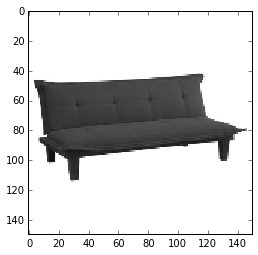

In [48]:
image = skimage.color.rgb2gray(image)
image = skimage.transform.resize(image, (150,150))
skimage.io.imshow(image)

In [99]:
features = np.array([image[irow][icol] for irow in range(150) for icol in range(150)])
#features = features.reshape((1,features.shape[0]))
features.shape

(22500,)

In [232]:
features_scaled = pca_scaler.transform(features)
pca_feature = pca_model.transform(features_scaled)

In [233]:
np.sum(features_scaled)

1245.6509291893972

In [234]:
pca_label = km_feature_pca.predict(pca_feature)[0]
pca_label

1

In [235]:
cluster_label_dict_pca['futon_DRL1299_12.jpg']

1

In [236]:
pca_same_label = []
for i in cluster_label_dict_pca:
    if cluster_label_dict_pca[i] == pca_label:
        pca_same_label.append(i)

In [237]:
similar_item_pca = []
for i in pca_same_label:
    similar_item_pca.append(i.split('.')[0].split('_')[-2])

## TFIDF

In [118]:
tfidf_vec = tfidf.transform([text]).todense()
tfidf_vec.shape

(1, 1000)

In [117]:
tfidf_matrix.shape

(1484, 1000)

In [213]:
text_cosine_distances = []
for i in xrange(tfidf_matrix.shape[0]):
    cosine_distance = cosine(tfidf_vec, tfidf_matrix[i,:])
    text_cosine_distances.append(cosine_distance)
text_cosine_distances = np.array(cosine_distances)

In [216]:
text_similr_indice = np.argsort(text_cosine_distances)[1:20]
text_similr_indice

array([1353, 1400,   89,  116, 1324, 1313, 1479, 1405,   86, 1372,  108,
       1312,  103, 1320,   88,    4, 1453, 1381, 1314])

In [215]:
np.array(text_cosine_distances)[np.argsort(text_cosine_distances)[1:20]]

array([ 0.29984124,  0.35517103,  0.40701951,  0.4517147 ,  0.45443642,
        0.45629436,  0.47222749,  0.49241003,  0.50717877,  0.51479985,
        0.51791456,  0.52076696,  0.52251194,  0.54331118,  0.54373845,
        0.54399674,  0.5450985 ,  0.54619865,  0.54810523])

In [219]:
text_similar_item = []
for i in text_similr_indice:
    index = int(sofa_all_df.index[i])
    product_id = sofa_all_df.ix[index, 'product_id']
    text_similar_item.append(product_id)

In [220]:
text_similar_item = [str(x) for x in text_similar_item]

In [221]:
similar_item_domi = list(set(similar_item_domi))
similar_item_pca = list(set(similar_item_pca))
text_similar_item = list(set(text_similar_item))

In [222]:
similar_item = similar_item_domi + similar_item_pca + text_similar_item

In [223]:
Counter(similar_item)

Counter({'ANDO1714': 1,
         'ANDO1737': 1,
         'ANH1980': 1,
         'ARA1254': 1,
         'ARA1257': 1,
         'ARA1474': 1,
         'ARA1475': 1,
         'BL3373': 1,
         'BL3380': 2,
         'BL3381': 1,
         'BL3393': 2,
         'BL3399': 2,
         'BL3408': 1,
         'BL3419': 1,
         'BL3422': 2,
         'BL3425': 1,
         'BL3428': 1,
         'BL3429': 1,
         'BL3430': 1,
         'BL5769': 1,
         'BL5784': 2,
         'BLD1115': 1,
         'BRH3744': 1,
         'BRH3828': 1,
         'BYSN1002': 1,
         'BYSN1003': 1,
         'BYSN1005': 1,
         'BYSN1014': 1,
         'BYSN1020': 1,
         'BYSN1032': 1,
         'BYSN1040': 1,
         'BYSN1056': 1,
         'BYSN1057': 1,
         'BYSN1133': 1,
         'BYSN1134': 1,
         'BYSN1210': 1,
         'BYSN1232': 1,
         'BYSN1241': 1,
         'BYSN1247': 1,
         'BYSN1253': 1,
         'BYV1682': 1,
         'BYV1686': 1,
         'BYV2438': 1,
       

In [224]:
[x for x in domi_same_label if 'CST16385' in x]

['futon_CST16385_1.jpg', 'futon_CST16385_0.jpg']

In [208]:
[x for x in domi_same_label if 'ENT1125' in x]

['sofa_ENT1125_11.jpg']

# Compare time to load tfidf_matrixes:
## Load from csv file is 10 times faster!!

In [246]:
start = time.time()
test_matrix = np.loadtxt("wayfair/pickle/tfidf_matrix.csv",delimiter=",")
time.time() - start

0.595829963684082

In [247]:
start = time.time()
with open('wayfair/pickle/sofa_tfidf_matrix.pkl') as f:
    tfidf_matrix = pickle.load(f)
time.time() - start

5.5685200691223145

In [257]:
test_matrix.shape, tfidf_matrix.shape

((1484, 1000), (1484, 1000))

In [258]:
np.mean(test_matrix == tfidf_matrix)

1.0

# Now recommand without kmeans!
# To do: rewrite image_process_new.py!!

Stuff I need:

domi:
* domi_dict: path -> vector

pca:
* pca_dict: path -> vector
* scaler
* pca model

text:
* tfidf 
* tfidf matrix (same sequence as df.index)

In [30]:
def get_reverse_dict(dict):
    reverse_dict = {}
    for i, j in dict.iteritems():
        reverse_dict[tuple(j)] = i
    return reverse_dict

In [210]:
domi_color_dict_no_false = {}
for i in domi_color_dict:
    if type(domi_color_dict[i]) != bool:
        domi_color_dict_no_false[i] = domi_color_dict[i]

domi_reverse_dict = get_reverse_dict(domi_color_dict_no_false)
pca_reverse_dict = get_reverse_dict(feature_dict_pca)

In [226]:
domi_distances = []
domi_vectors = domi_reverse_dict.keys()
for i in domi_vectors:
    domi_distance = euclidean(domi_color, i)
    domi_distances.append(domi_distance)
domi_distances = np.array(domi_distances)

In [231]:
max(domi_distances), min(domi_distances)

(1.0717033899089645, 0.0)

In [238]:
pca_distances = []
pca_vectors = pca_reverse_dict.keys()
for i in pca_vectors:
    pca_distance = euclidean(pca_feature, i)
    pca_distances.append(pca_distance)
pca_distances = np.array(pca_distances)

In [243]:
max(pca_distances), min(pca_distances)

(950.64678057264064, 0.97202037944363495)

domi_distances: 0 - 1.07
pca_distances: 0.97 - 950
text_distances: 0 - 1

new dictionary
key: path
value: domi_distances + pca_distances/n   n=1000 ?

dataframe:
path, product_id, domi_distance, pca_distance, text_distance, total_distance

In [266]:
# once get total_distance, sort by that (tested with price below) 
# and get the top 3-6 product_id
x = sofa_all_df[['product_id','price']].values
sorted(x, key=lambda x:x[1])[:5]

[array([u'BCTW1031', 66.99], dtype=object),
 array([u'EPCF1056', 106.99], dtype=object),
 array([u'NUOV1018', 109.99], dtype=object),
 array([u'DRL1086', 114.99], dtype=object),
 array([u'DRL1371', 116.99], dtype=object)]